In [1]:
# Lending CaseStudy


In [2]:
## A.Import Data

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')


###Load data
loan_df=pd.read_csv("loan.csv")

###check the dimension of the dataset
loan_df.shape



(39717, 111)

In [39]:
###data set details

loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
### Check the meta data info

loan_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [6]:
### check the data desciption about numeric columns
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
## B.Data Cleaning

In [8]:
###check the no of Null value columns in the Data set

loan_df.isna().sum()[loan_df.isna().sum()>0].count()

68

In [9]:
###calculate the % of the missing values columns

missing_values=(loan_df.isna().sum()/loan_df.shape[0])*100
missing_values

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [10]:
### Get more than 50% missing value columns
missing_values_columns=missing_values[missing_values>=50]
missing_values_columns.index


Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [11]:
### drop the columns which has greater than 50% 
loan_df_stage1=loan_df.drop(columns=missing_values_columns.index)


In [12]:
### check the info and shape
loan_df_stage1.info(verbose=True)
loan_df_stage1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

(39717, 54)

In [13]:
### Remove the columns which are not need for this analysis or has mostly the empty values
#removing the columns which are having single values or post approval data
loan_df_stage1=loan_df_stage1.drop(columns=['url', 'desc','tax_liens','collections_12_mths_ex_med','delinq_amnt','zip_code','chargeoff_within_12_mths','emp_title','member_id','id','acc_now_delinq','pymnt_plan','title','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','policy_code','application_type','funded_amnt','pub_rec_bankruptcies'])
loan_df_stage1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

In [14]:
## C.Imputing the Data 

In [15]:
### Handling missing values imputing/removing the rows
loan_df_stage1.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,CA,20.00,0,Feb-96,1,10,0,5598,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38


In [16]:
### calculating missing % for the left out cilumns
missing_values_percentage=(loan_df_stage1.isna().sum()/loan_df_stage1.shape[0])*100
missing_values_percentage

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
delinq_2yrs            0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_bal              0.000000
revol_util             0.125891
total_acc              0.000000
dtype: float64

In [17]:
### Removing empty rows from emp_lenght and revol_util columns since those are very low in %
loan_df_stage1.dropna(axis=0,subset=['emp_length'],inplace=True)
loan_df_stage1.dropna(axis=0,subset=['revol_util'],inplace=True)
loan_df_stage1.shape


(38595, 24)

In [18]:
loan_df_stage1.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,CA,20.00,0,Feb-96,1,10,0,5598,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38


In [19]:
### Removing the % from the int_rate column ,months from the term and % from the revol_util
loan_df_stage1["int_rate"] = loan_df_stage1["int_rate"].str.replace("%", "")
loan_df_stage1["term"] = loan_df_stage1["term"].str.replace("months", "")
loan_df_stage1["revol_util"] = loan_df_stage1["revol_util"].str.replace("%", "")



In [20]:
### standardization of values in emp_length column
loan_df_stage1.emp_length.value_counts()
loan_df_stage1["emp_length"]=pd.to_numeric(loan_df_stage1["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
loan_df_stage1.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,...,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,...,CA,20.00,0,Feb-96,1,10,0,5598,21,37
4,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,...,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38


In [21]:
### Removing the loan_status as Current from the loan dataset since they are current customer 
loan_df_stage1.loan_status.value_counts()
loan_df_stage1.drop(loan_df_stage1[loan_df_stage1['loan_status'] =='Current'].index, inplace = True)
loan_df_stage1.loan_status.value_counts()

Fully Paid     32113
Charged Off     5384
Name: loan_status, dtype: int64

In [22]:
### convert issue_d into the datetime formart 
from datetime import datetime
loan_df_stage1.issue_d.value_counts()
loan_df_stage1['issue_d'] = loan_df_stage1['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))


In [23]:
### derive a month and year column from the issue_d
loan_df_stage1['issue_d_month']=loan_df_stage1['issue_d'].apply(lambda x:(pd.to_datetime(x).month))
loan_df_stage1['issue_d_year']=loan_df_stage1['issue_d'].apply(lambda x:(pd.to_datetime(x).year))
loan_df_stage1.head()


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,issue_d_month,issue_d_year
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,0,Jan-85,1,3,0,13648,83.70,9,12,2011
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,...,0,Apr-99,5,3,0,1687,9.40,4,12,2011
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,0,Nov-01,2,2,0,2956,98.50,10,12,2011
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,...,0,Feb-96,1,10,0,5598,21,37,12,2011
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,...,0,Nov-04,3,9,0,7963,28.30,12,12,2011


In [24]:
## D.Data Analysis 

In [25]:
#### a. Univariate Analysis 
#converting to numeric values 
columns = ['loan_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','emp_length']
loan_df_stage1[columns] = loan_df_stage1[columns].apply(pd.to_numeric)

<AxesSubplot:xlabel='loan_amnt'>

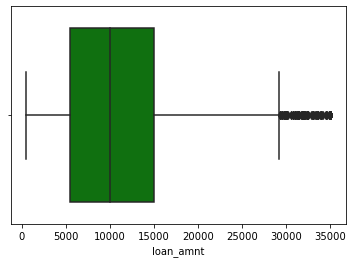

In [26]:
# Checking the outliers in loan_amnt
sb.boxplot(loan_df_stage1.loan_amnt,color='Green')

In [27]:
loan_df_stage1.loan_amnt.describe()

count    37497.000000
mean     11127.362856
std       7353.972102
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [28]:
# Checking the outliers in int_rate
loan_df_stage1.int_rate.describe()


count    37497.000000
mean        11.958772
std          3.682062
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

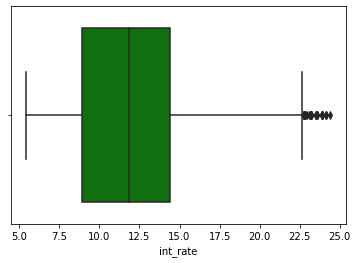

In [29]:
sb.boxplot(loan_df_stage1.int_rate,color='Green')

In [30]:
# checking the outliers in annual_inc
loan_df_stage1.annual_inc.describe().apply(lambda x: format(x, 'f'))



count      37497.000000
mean       69436.526339
std        64672.078162
min         4000.000000
25%        41000.000000
50%        60000.000000
75%        83000.000000
max      6000000.000000
Name: annual_inc, dtype: object

In [56]:
### removing outliers in annual_inc
loan_df_stage1 = loan_df_stage1[loan_df_stage1["annual_inc"] < loan_df_stage1["annual_inc"].quantile(0.99)]

<AxesSubplot:xlabel='annual_inc'>

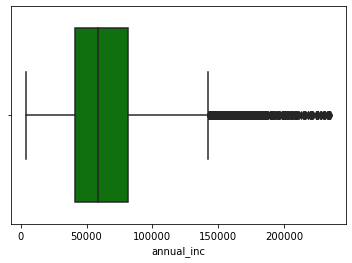

In [58]:
sb.boxplot(loan_df_stage1.annual_inc,color='Green')

In [57]:
### After removing the outliers in annual_inc
loan_df_stage1.annual_inc.describe().apply(lambda x: format(x, 'f'))


count     37119.000000
mean      65938.565489
std       35148.207787
min        4000.000000
25%       41000.000000
50%       59000.000000
75%       81777.000000
max      234996.000000
Name: annual_inc, dtype: object

In [32]:
loan_df_stage1.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,issue_d_month,issue_d_year
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,0,Jan-85,1,3,0,13648,83.70,9,12,2011
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,...,0,Apr-99,5,3,0,1687,9.40,4,12,2011
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,0,Nov-01,2,2,0,2956,98.50,10,12,2011
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,...,0,Feb-96,1,10,0,5598,21,37,12,2011
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,...,0,Nov-04,3,9,0,7963,28.30,12,12,2011


In [33]:
# updating the loan staus if loan_staus is 'Fully Paid' then 1 else 0

loan_df_stage1['loan_status']=loan_df_stage1['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)

In [50]:
#Univariate Analysis 
## Categorical Variables

def Barplot(x):
    plt.figure(figsize=(10,5))
    sb.barplot(x=x, y='loan_status', data=loan_df_stage1)
    plt.title("Loan Defaults in terms of "+str(x)+" variable - countplot")
    plt.xlabel(x, fontsize=15)
    plt.ylabel("defaulter count", fontsize=16)
    plt.show()
    
def Lineplot(x):
    plt.figure(figsize=(10,5))
    sb.lineplot(x=x, y='loan_status', data=loan_df_stage1)
    plt.title("Loan Defaults in terms of "+str(x)+" variable - lineplot")
    plt.xlabel(x, fontsize=15)
    plt.ylabel("defaulter count", fontsize=16)
    plt.show()   
    
    

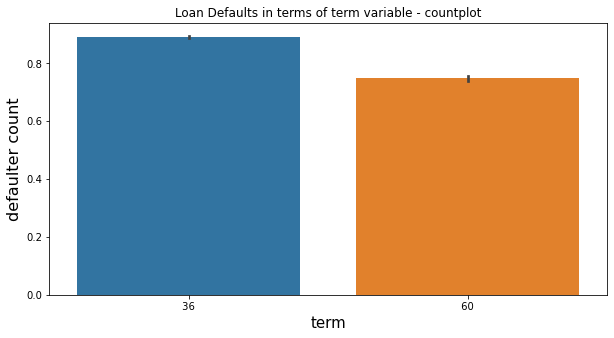

In [41]:
Barplot("term")
# Observations :
# Below plot shows more loans were charged off out of total loan issued.

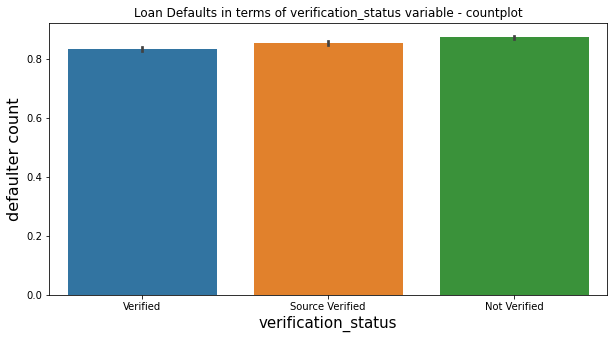

In [42]:
Barplot("verification_status")

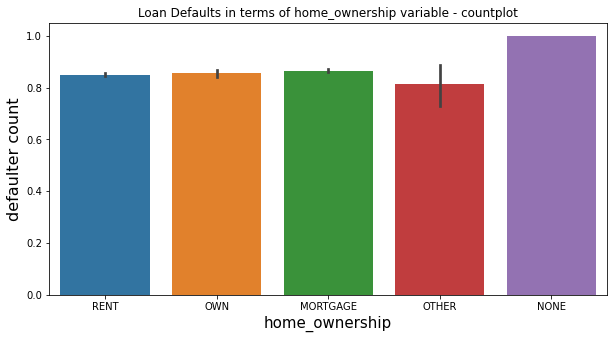

In [43]:
Barplot("home_ownership")

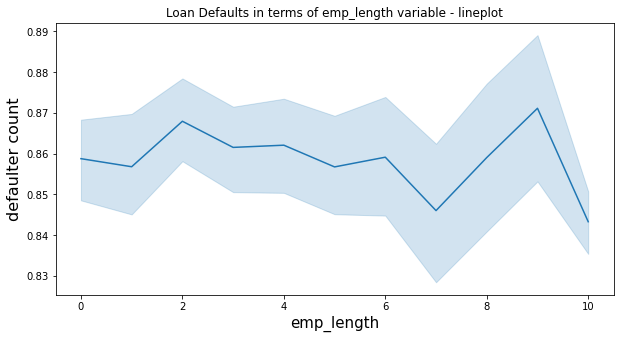

In [51]:
Lineplot("emp_length")

In [59]:
loan_df_stage1.annual_inc.describe().apply(lambda x: format(x, 'f'))

count     37119.000000
mean      65938.565489
std       35148.207787
min        4000.000000
25%       41000.000000
50%       59000.000000
75%       81777.000000
max      234996.000000
Name: annual_inc, dtype: object

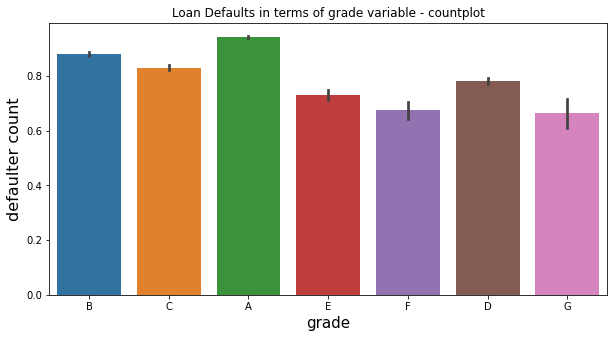

In [63]:
Barplot("grade")

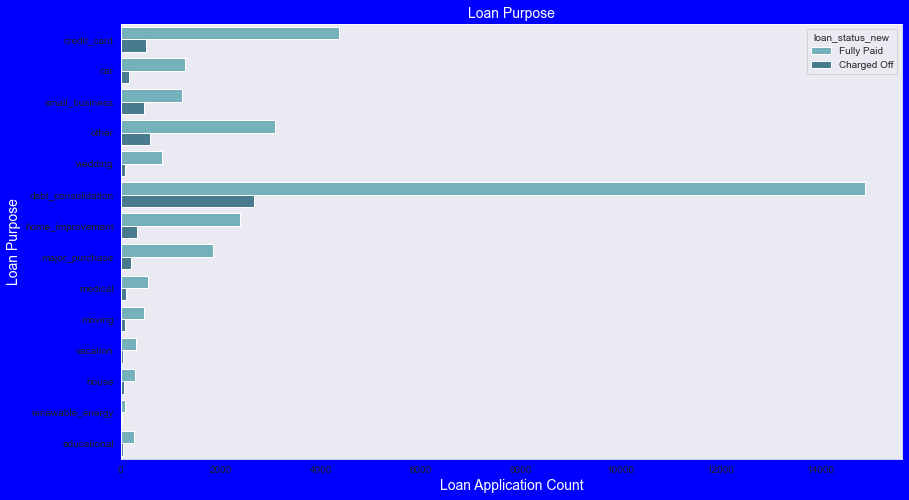

In [112]:
plt.figure(figsize=(14,8),facecolor='b')
sb.set_style("dark")
ax = sb.countplot(y="purpose",data=loan_df_stage1,hue='loan_status_new',palette='GnBu_d')
ax.set_title('Loan Purpose',fontsize=14,color='w')
ax.set_ylabel('Loan Purpose',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# The plot shpwing that huge no of the loans was taken for debt consolidation purpose and credit card bill.
#chraged off count also high for those loans.

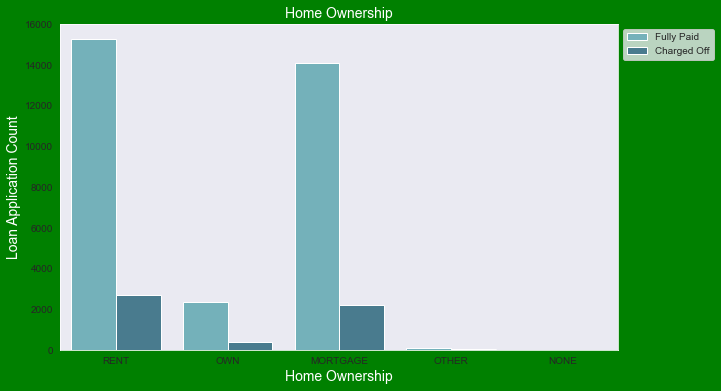

In [110]:
plt.figure(figsize=(10,6),facecolor='g')
ax = sb.countplot(x="home_ownership",data=loan_df_stage1,hue='loan_status_new',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

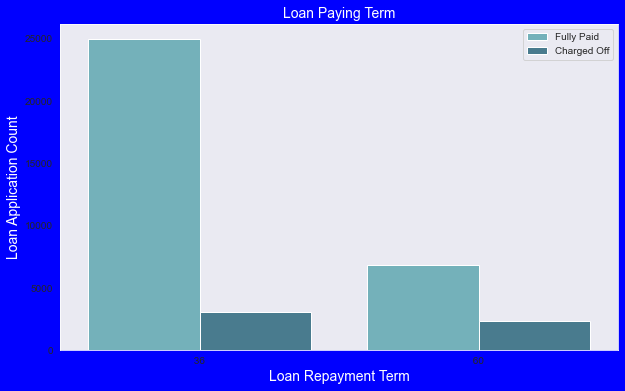

In [111]:
plt.figure(figsize=(10,6),facecolor='b')
ax = sb.countplot(x="term",data=loan_df_stage1,hue='loan_status_new',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

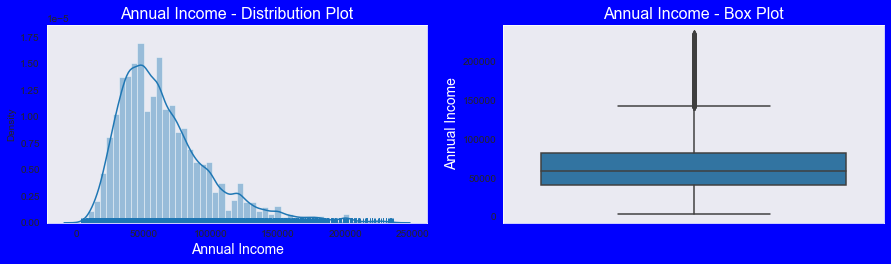

In [115]:
# Univariate Analysis on Annual Income - Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sb.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sb.distplot(loan_df_stage1['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sb.boxplot(y=loan_df_stage1['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the borrower's Annual incomes are in range of 40000- 80000


In [68]:
##Bivariate Analysis
#Creating new Column for the Loan status
loan_df_stage1['loan_status_new']=loan_df_stage1['loan_status'].apply(lambda x: 'Fully Paid' if x== 1 else 'Charged Off')


In [69]:
# Derived columns
# categorise loan amounts into buckets for bivariate analysis.
loan_df_stage1['loan_amnt_bin'] = pd.cut(loan_df_stage1['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets for bivariate analysis.
loan_df_stage1['annual_inc_bin'] = pd.cut(loan_df_stage1['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

In [72]:
# categorise intrest rates into buckets for bivariate analysis.
loan_df_stage1['int_rate_bin'] = pd.cut(loan_df_stage1['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

In [82]:
### Bivariate Analysis for loan_status aganist Charged Off percentage

income_vs_loan = loan_df_stage1.groupby(['annual_inc_bin', 'loan_status_new']).loan_status_new.count().unstack().fillna(0).reset_index()
income_vs_loan['Total'] = income_vs_loan['Charged Off'] + income_vs_loan['Fully Paid'] 
income_vs_loan['Chargedoff_percentage'] = income_vs_loan['Charged Off'] / income_vs_loan['Total']*100
income_vs_loan.sort_values('Chargedoff_percentage', ascending=False)

### who has income more than 80000+ has less charge off and 0-20000 has the more defaulters 
### one more observation is that 0-20000 no of application count is very lesss compared to the other bins

loan_status_new,annual_inc_bin,Charged Off,Fully Paid,Total,Chargedoff_percentage
0,0-20000,187,809,996,18.775100
1,20000-40000,1415,6697,8112,17.443294
2,40000-60000,1671,9320,10991,15.203348
3,60000-80000,1001,6502,7503,13.341330
4,80000 +,1068,8449,9517,11.222024


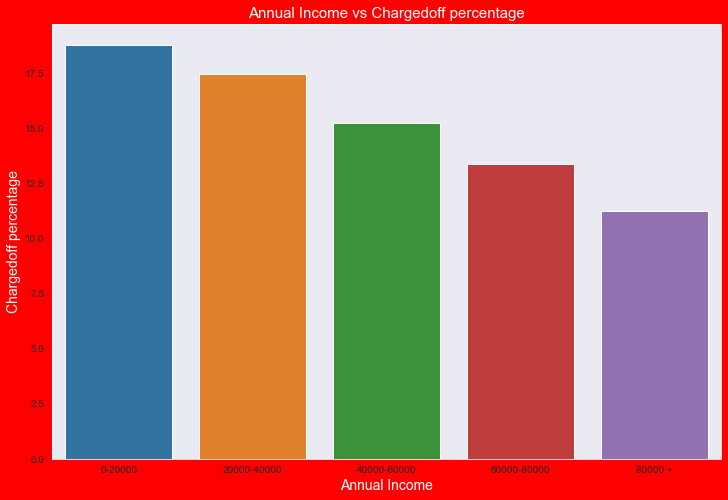

In [84]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='r')
ax1.set_title('Annual Income vs Chargedoff percentage',fontsize=15,color = 'w')
ax1=sb.barplot(x='annual_inc_bin', y='Chargedoff_percentage', data=income_vs_loan)
ax1.set_ylabel('Chargedoff percentage',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

### who has income more than 80000+ has less charge off and 0-20000 has the more defaulters 
### one more observation is that 0-20000 no of application count is very lesss compared to the other bins

In [88]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = loan_df_stage1.groupby(['purpose', 'loan_status_new']).loan_status_new.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Percentage'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total'] *100
purpose_vs_loan.sort_values('Chargedoff_Percentage', ascending=False)

# Observations:
# small Business applicants has high chnaces of getting more defaulters.
# renewable_energy where chanrged off percentage is better as compare to other categories.


loan_status_new,purpose,Charged Off,Fully Paid,Total,Chargedoff_Percentage
11,small_business,459,1220,1679,27.337701
10,renewable_energy,18,74,92,19.565217
5,house,58,286,344,16.860465
3,educational,51,261,312,16.346154
9,other,588,3079,3667,16.034906
7,medical,100,547,647,15.455951
8,moving,83,461,544,15.257353
2,debt_consolidation,2659,14869,17528,15.170014
12,vacation,50,297,347,14.409222
4,home_improvement,319,2385,2704,11.797337


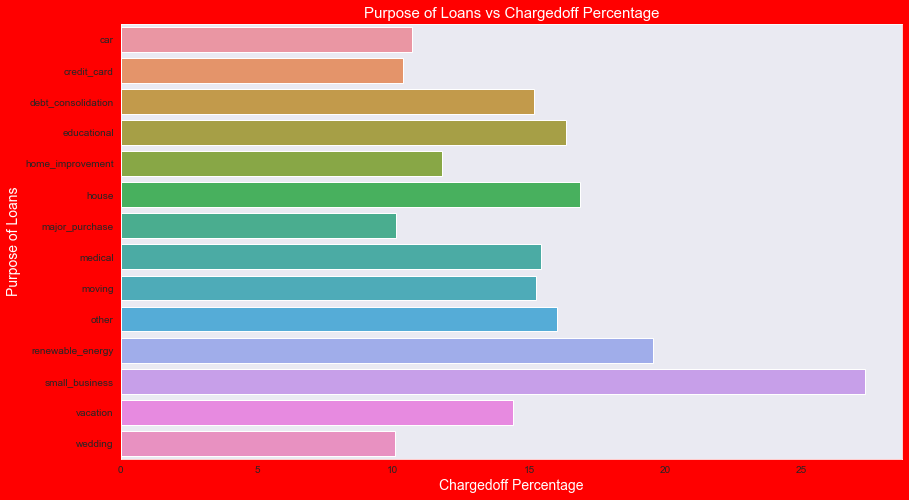

In [93]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='r')
ax1.set_title('Purpose of Loans vs Chargedoff Percentage',fontsize=15,color = 'w')
ax1=sb.barplot(y='purpose', x='Chargedoff_Percentage', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Percentage',fontsize=14,color = 'w')
plt.show()

# Observations:
# small Business applicants has high chnaces of getting more defaulters.
# renewable_energy where chanrged off percentage is better as compare to other categories.

In [94]:
# Bivariate Analysis on Interset rate of Loan against Chargedoff_Proportion.

Intrest_vs_loan = loan_df_stage1.groupby(['int_rate_bin', 'loan_status_new']).loan_status_new.count().unstack().fillna(0).reset_index()
Intrest_vs_loan['Total'] = Intrest_vs_loan['Charged Off'] + Intrest_vs_loan['Fully Paid'] 
Intrest_vs_loan['Chargedoff_Percentage'] = Intrest_vs_loan['Charged Off'] / Intrest_vs_loan['Total'] *100
Intrest_vs_loan.sort_values('Chargedoff_Percentage', ascending=False)

# More Intrest rate leading to high charged off percentage
#Low intrest rate has very less chance for the defaulters 

loan_status_new,int_rate_bin,Charged Off,Fully Paid,Total,Chargedoff_Percentage
3,16 +,1208,3242,4450,27.146067
2,12.5-16,1918,9185,11103,17.274610
1,10-13,1175,7915,9090,12.926293
0,0-10,758,10988,11746,6.453261


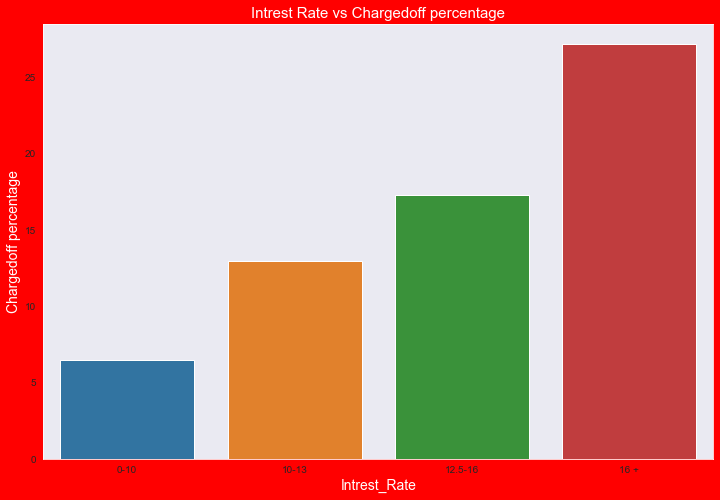

In [97]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='r')
ax1.set_title('Intrest Rate vs Chargedoff percentage',fontsize=15,color = 'w')
ax1=sb.barplot(x='int_rate_bin', y='Chargedoff_Percentage', data=Intrest_vs_loan)
ax1.set_ylabel('Chargedoff percentage',fontsize=14,color = 'w')
ax1.set_xlabel('Intrest_Rate',fontsize=14,color='w')
plt.show()

# More Intrest rate leading to high charged off percentage
#Low intrest rate has very less chance for the defaulters 

In [99]:
# Bivariate Analysis on Home owenership of Loan against Chargedoff_Percentage.

Home_Ownership_vs_loan = loan_df_stage1.groupby(['home_ownership', 'loan_status_new']).loan_status_new.count().unstack().fillna(0).reset_index()
Home_Ownership_vs_loan['Total'] = Home_Ownership_vs_loan['Charged Off'] + Home_Ownership_vs_loan['Fully Paid'] 
Home_Ownership_vs_loan['Chargedoff_Percentage'] = Home_Ownership_vs_loan['Charged Off'] / Home_Ownership_vs_loan['Total'] *100
Home_Ownership_vs_loan.sort_values('Chargedoff_Percentage', ascending=False)

# changes are high for defaulters thise who stays in rented house 
#others also has the huge defaulters percentage

loan_status_new,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Percentage
2,OTHER,18.0,76.0,94.0,19.148936
4,RENT,2711.0,15254.0,17965.0,15.090454
3,OWN,396.0,2342.0,2738.0,14.463112
0,MORTGAGE,2217.0,14102.0,16319.0,13.585391
1,NONE,0.0,3.0,3.0,0.000000


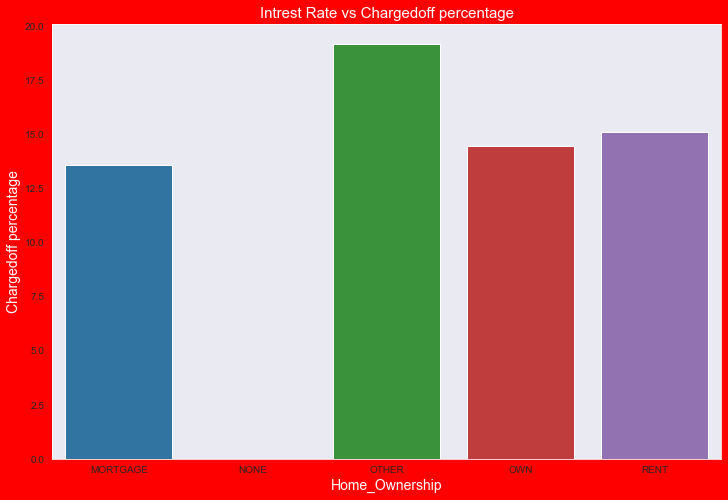

In [100]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='r')
ax1.set_title('Intrest Rate vs Chargedoff percentage',fontsize=15,color = 'w')
ax1=sb.barplot(x='home_ownership', y='Chargedoff_Percentage', data=Home_Ownership_vs_loan)
ax1.set_ylabel('Chargedoff percentage',fontsize=14,color = 'w')
ax1.set_xlabel('Home_Ownership',fontsize=14,color='w')
plt.show()

# changes are high for defaulters thise who stays in rented house 
#others also has the huge defaulters percentage

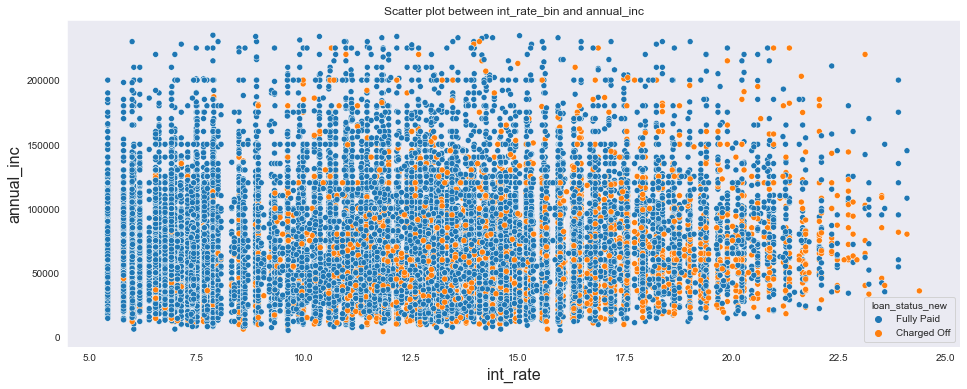

In [107]:
plt.figure(figsize=(16,6))   
sb.scatterplot(x='int_rate', y='annual_inc', hue="loan_status_new", data=loan_df_stage1)
plt.title("Scatter plot between int_rate_bin and annual_inc")
plt.xlabel('int_rate', fontsize=16)
plt.ylabel('annual_inc', fontsize=16)
plt.show()

## defaulters are very high for more intrest rates

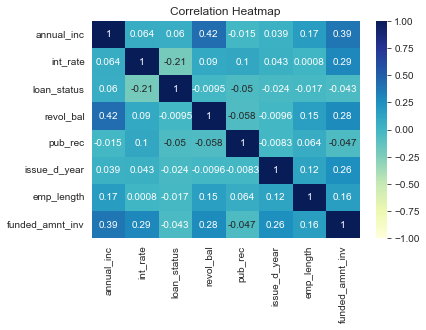

In [118]:
#Multivariate Analysis (Correlation)

# plot heat map to see correlation between features
continuous_f = ["annual_inc", "term", "int_rate", "loan_status", "revol_util","revol_bal","pub_rec","issue_d_year","emp_length","funded_amnt_inv"]
loan_correlation = loan_df_stage1[continuous_f].corr()
sb.heatmap(loan_correlation,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()